In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import community
from pprint import pprint
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
G = nx.read_edgelist('facebook_combined.txt')

## Rubric 1

In [3]:
dendrogram = community.generate_dendrogram(G, randomize=False)
print('Number of levels : ', len(dendrogram))

Number of levels :  3


In [4]:
for level in range(len(dendrogram)):
    print("Partition at level ", level)
    res = community.partition_at_level(dendrogram, level)
    print('Number of communities ', len(set(res.values())))
    print('Modularity', community.modularity(res, G))

Partition at level  0
Number of communities  98
Modularity 0.807898377959521
Partition at level  1
Number of communities  18
Modularity 0.8348525180413877
Partition at level  2
Number of communities  16
Modularity 0.8348939979510115


In [5]:
res = community.best_partition(G, randomize=False)
print('Number of communities ', len(set(res.values())))
print('Modularity', community.modularity(res, G))

Number of communities  16
Modularity 0.8348939979510115


In [6]:
from collections import Counter
Counter(res.values())

Counter({9: 548,
         4: 535,
         8: 447,
         1: 431,
         3: 423,
         0: 350,
         5: 324,
         11: 237,
         15: 226,
         14: 206,
         6: 116,
         10: 73,
         13: 60,
         12: 25,
         2: 19,
         7: 19})

### We observe ncreasing modularity, Louvain clustering increases modularity at each step

# Rubric 2


## Different statistics +  features of top 2-3 communities at each level


In [7]:
for level in range(len(dendrogram)) :
    print('------------')
    print("Partition at level ", level)
    res = community.partition_at_level(dendrogram, level)
    print('Number of communities ', len(set(res.values())))
    comm_dict = {c: [] for c in set(res.values())}
    comm_size = {c: 0 for c in set(res.values())}
    for node,comm in res.items() :
        comm_dict[comm].append(node)
        comm_size[comm] = comm_size[comm] + 1
    
    # sort by size
    sorted_dict = sorted(comm_size.items(), key=lambda k: (k[1], k[0]), reverse=True)
    
    # take top 3; list of their community ids
    top_3_comm = [ s[0] for s in sorted_dict[:3] ]
    print( 'Analysis of top 3 communities by size at each level 0 , 1 and 2')
    for t in top_3_comm:
        print('-->')
        sg = nx.subgraph(G,comm_dict[t])
        print('Number of nodes ', sg.number_of_nodes())
        print('Number of nodes ', sg.number_of_edges())
        print('Average Shortest Path Length', nx.average_shortest_path_length(sg))
        print('Average Clustering ',nx.average_clustering(sg))
        print('Diameter' , nx.diameter(sg))
        print('Density', nx.density(sg))
        print('<--')
    print('------------')

------------
Partition at level  0
Number of communities  98
Analysis of top 3 communities by size at each level 0 , 1 and 2
-->
Number of nodes  473
Number of nodes  8376
Average Shortest Path Length 1.9287096427419643
Average Clustering  0.4753067656835991
Diameter 3
Density 0.07503493747088544
<--
-->
Number of nodes  420
Number of nodes  16625
Average Shortest Path Length 1.811058074781225
Average Clustering  0.5678941674252022
Diameter 2
Density 0.18894192521877487
<--
-->
Number of nodes  290
Number of nodes  10126
Average Shortest Path Length 1.7583581911466413
Average Clustering  0.6467827490996032
Diameter 2
Density 0.24164180885335879
<--
------------
------------
Partition at level  1
Number of communities  18
Analysis of top 3 communities by size at each level 0 , 1 and 2
-->
Number of nodes  548
Number of nodes  5356
Average Shortest Path Length 1.9712432778659976
Average Clustering  0.624584047933371
Diameter 3
Density 0.03573573172847249
<--
-->
Number of nodes  535
Numb

## More important would be the top communities at level 2

## 

In [8]:
level = 2
res = community.partition_at_level(dendrogram, level)
print('Number of communities ', len(set(res.values())))
comm_dict = {c : [] for c in set(res.values())}
comm_size = {c : 0 for c in set(res.values())}
for node, comm in res.items() :
        comm_dict[comm].append(node)
        comm_size[comm] = comm_size[comm] + 1
for c, s in comm_size.items():
    print(' Community ', c, 'Size :', s)
    sg = nx.subgraph(G,comm_dict[c])
    print('Avg shortest path ', nx.average_shortest_path_length(sg))
    print('Avg clustering coeff ', nx.average_clustering(sg))
    print('--')

Number of communities  16
 Community  0 Size : 350
Avg shortest path  1.991846090871879
Avg clustering coeff  0.6515648285843236
--
 Community  1 Size : 431
Avg shortest path  2.449738304645767
Avg clustering coeff  0.5918293041316088
--
 Community  2 Size : 19
Avg shortest path  1.2046783625730995
Avg clustering coeff  0.8912780717734277
--
 Community  3 Size : 423
Avg shortest path  1.872026710586759
Avg clustering coeff  0.6168204259662693
--
 Community  4 Size : 535
Avg shortest path  1.9425181140396934
Avg clustering coeff  0.5161868723957442
--
 Community  5 Size : 324
Avg shortest path  2.296640293544318
Avg clustering coeff  0.56388348569262
--
 Community  6 Size : 116
Avg shortest path  2.9661169415292354
Avg clustering coeff  0.6863555631832499
--
 Community  7 Size : 19
Avg shortest path  1.2456140350877194
Avg clustering coeff  0.842723745123126
--
 Community  8 Size : 447
Avg shortest path  1.8318335490213782
Avg clustering coeff  0.5822249077330657
--
 Community  9 Size :

### We observe that the communities with samller size have greater clustering and lower value of average shortest path length


0 4039
1 98
2 18


/Users/pbutler/anaconda3/lib/python3.11/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: 1 is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


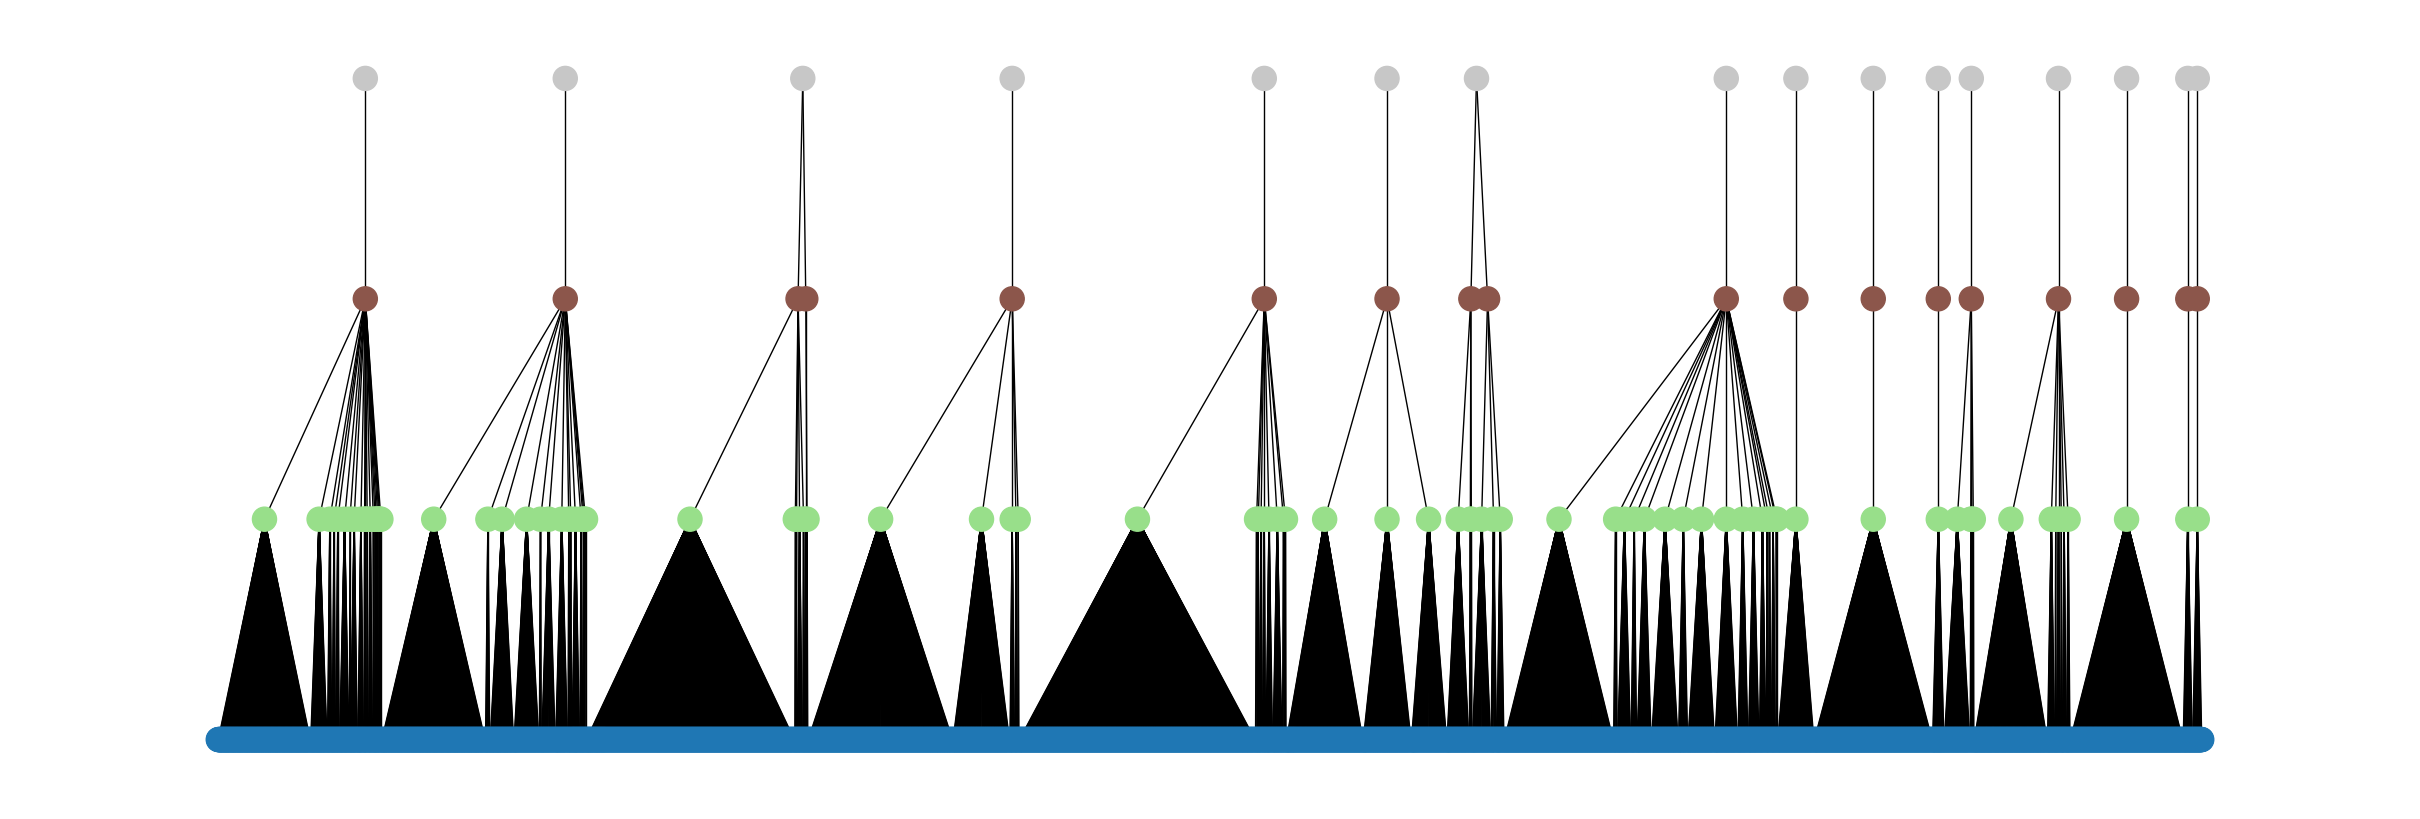

In [9]:
pg = nx.DiGraph()

last_part = None
for l, part in enumerate(dendrogram):
    print(l, len(part))
    for n, comm in part.items():
        # level = ?, community = ?
        nom = "l={}_{}".format(l, comm)
        pg.add_node(nom, comm=comm, color=l+1)

        if l == 0:
            pg.add_node(n, comm=comm, color=0)
            pg.add_edge(nom, n)
        else: 
            pg.add_edge(nom, "l={}_{}".format(l-1, n))
    last_part = part
   

plt.figure(figsize=(24,8))

colors = list(nx.get_node_attributes(pg, 'color').values())

pos = graphviz_layout(pg, prog='dot')
nx.draw(pg, pos, with_labels=False, arrows=False, node_color=colors, vmin=0, vmax=len(dendrogram) + 1, cmap=plt.cm.tab20)

This graph is optional as it's done in Gephi

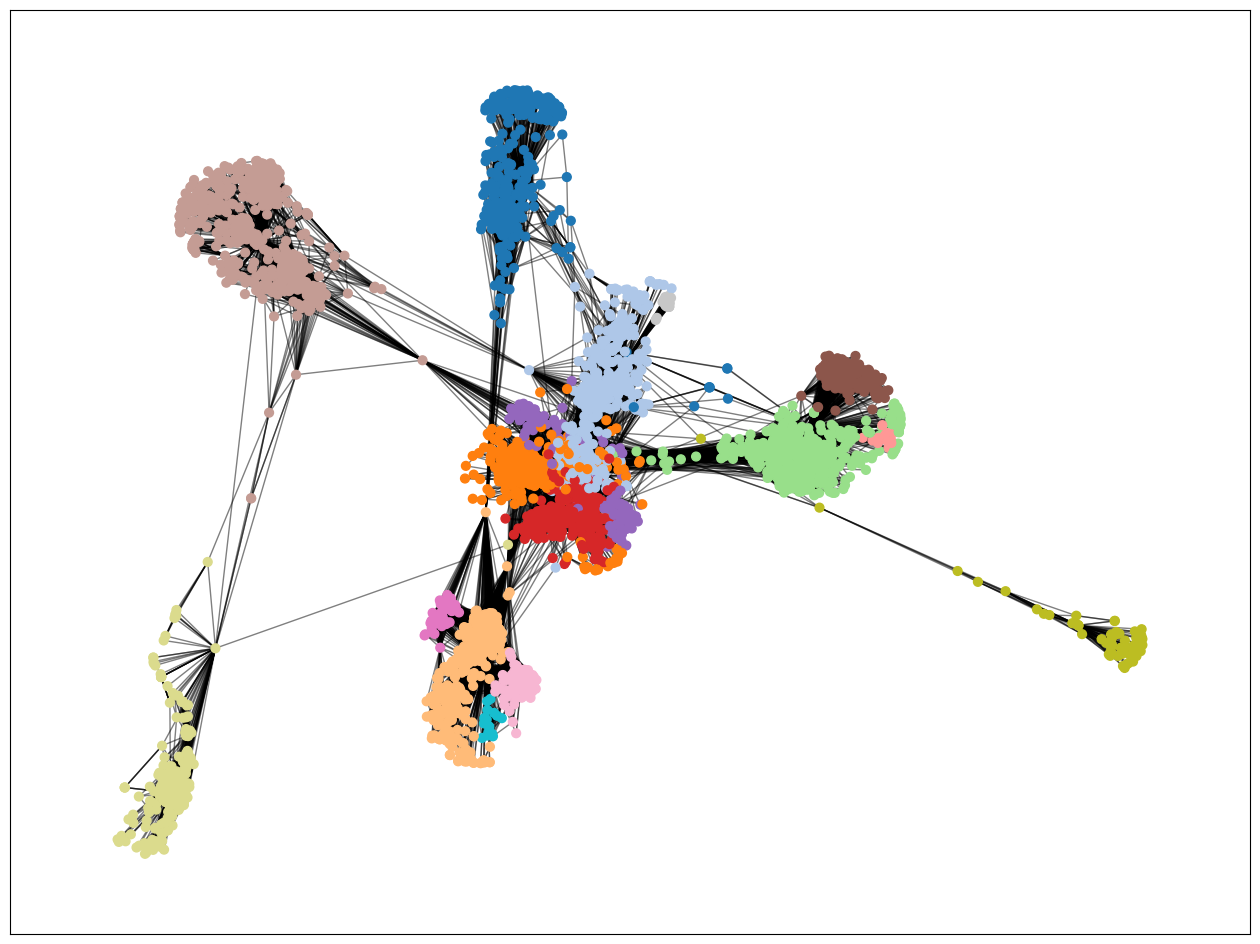

In [10]:
plt.figure(figsize=(16, 12))

partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
node_list = [n for n, n_com in sorted(partition.items())]
node_colors = [n_com for n, n_com in sorted(partition.items())]
    
nx.draw_networkx_nodes(G, pos, node_list, node_size=40, 
                       # the arguments below here make each community a different color
                       vmin=0, vmax=size,
                       node_color=node_colors, cmap=plt.cm.tab20)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# Rubric 3

In [11]:
sg = nx.depth_first_search.dfs_tree(G, '1', 4)
sg = G.subgraph(sg.nodes)

optional graph

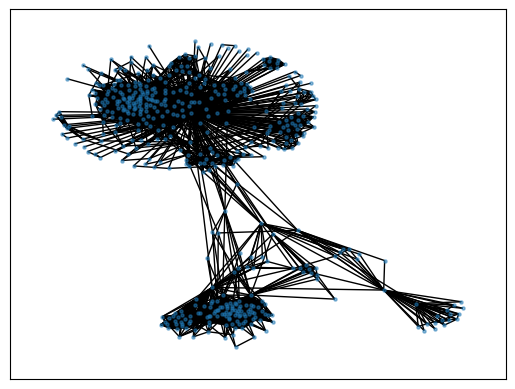

In [12]:
pos = nx.spring_layout(sg)
nx.draw_networkx_nodes(sg, pos, alpha=0.5, node_size=5)
nx.draw_networkx_edges(sg, pos)

In [13]:
print("len(subgraph)", len(sg))
print("----")
for k in range(2, 21):
    kcliq = nx.community.k_clique_communities(sg, k=k)
    num = len([cliq for cliq in kcliq])
    print(f'Number of {k}-cliques {num}')

len(subgraph) 504
----
Number of 2-cliques 1
Number of 3-cliques 5
Number of 4-cliques 13
Number of 5-cliques 16
Number of 6-cliques 15
Number of 7-cliques 15
Number of 8-cliques 9
Number of 9-cliques 8
Number of 10-cliques 7
Number of 11-cliques 6
Number of 12-cliques 4
Number of 13-cliques 5
Number of 14-cliques 4
Number of 15-cliques 3
Number of 16-cliques 3
Number of 17-cliques 1
Number of 18-cliques 3
Number of 19-cliques 0
Number of 20-cliques 0


## Rubric 3 needs to use k_clique_communities

# Rubric 4:

### Gephi plot